In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [3]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["target"]=iris.target

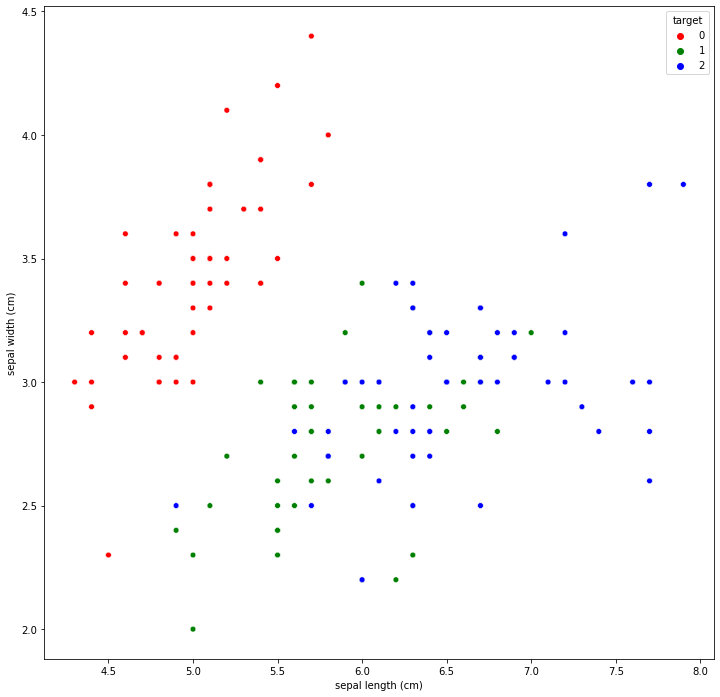

In [7]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df["sepal length (cm)"],y=df["sepal width (cm)"],hue=df.target,palette=(["red","green","blue"]),marker="8")
plt.show()                                                                                    
                                                                                          

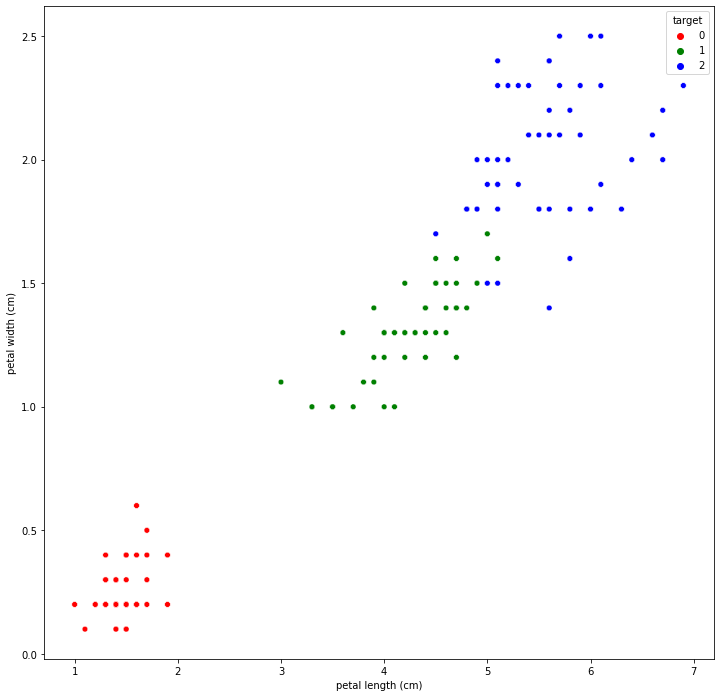

In [8]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df["petal length (cm)"],y=df["petal width (cm)"],hue=df.target,palette=(["red","green","blue"]),marker="8")
plt.show()                                                                                    
                   

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [10]:
features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']


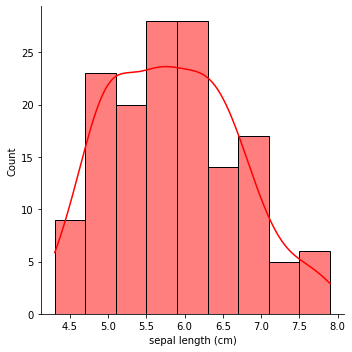

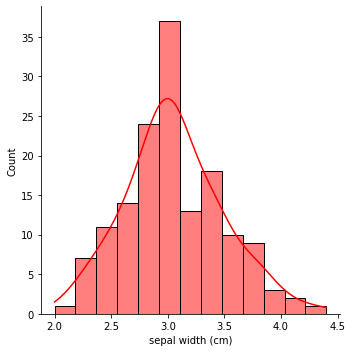

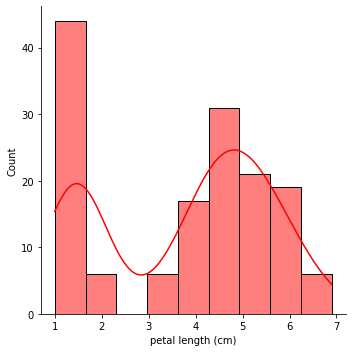

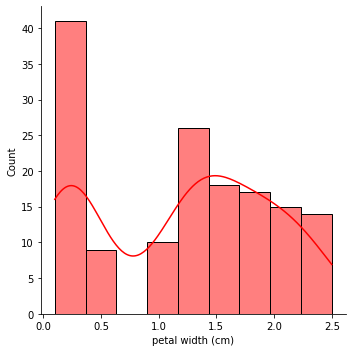

In [12]:
for f in features:
    sns.displot(df[f],color="red",kde=True)
    plt.show()

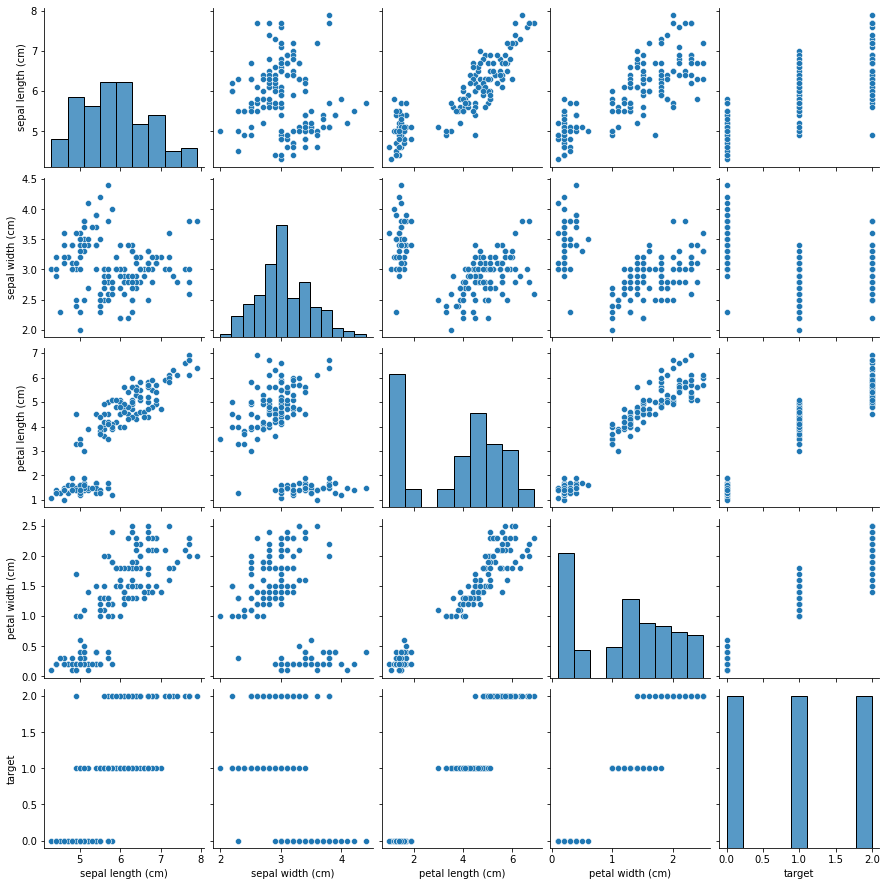

In [13]:
sns.pairplot(df)

<AxesSubplot:>

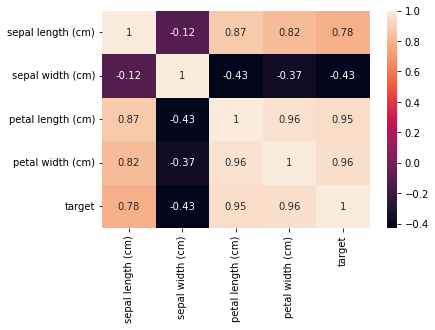

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [18]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [19]:
#splitting the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


In [21]:
# Using GridSearchCV

gscv=GridSearchCV(SVC(gamma="auto"),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)

gscv.fit(x_train,y_train)
gscv.cv_results_

{'mean_fit_time': array([0.00339103, 0.00298553, 0.00395541, 0.00139103, 0.00140915,
        0.        ]),
 'std_fit_time': array([0.00184814, 0.00177674, 0.00645712, 0.00048262, 0.00047804,
        0.        ]),
 'mean_score_time': array([0.00179439, 0.00119677, 0.00060377, 0.00079861, 0.00059867,
        0.        ]),
 'std_score_time': array([0.0003989 , 0.00097716, 0.00049308, 0.00039931, 0.00048881,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [22]:
df1=pd.DataFrame(gscv.cv_results_)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003391,0.001848,0.001794,0.000399,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,0.833333,0.833333,0.933333,0.081650,1
1,0.002986,0.001777,0.001197,0.000977,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,0.833333,0.833333,0.933333,0.081650,1
2,0.003955,0.006457,0.000604,0.000493,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,1.0,1.0,0.666667,0.833333,0.900000,0.133333,5
3,0.001391,0.000483,0.000799,0.000399,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,0.666667,1.000000,0.933333,0.133333,3
4,0.001409,0.000478,0.000599,0.000489,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,1.0,1.0,0.666667,0.833333,0.900000,0.133333,5


In [23]:
df1[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.933333
1,1,linear,0.933333
2,10,rbf,0.900000
3,10,linear,0.933333
4,20,rbf,0.900000
5,20,linear,0.933333


In [24]:
gscv.best_score_

0.9333333333333333

In [25]:
gscv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [26]:
# Using RandomSearchCV

rscv=RandomizedSearchCV(SVC(gamma="auto"),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=3)

rscv.fit(x_train,y_train)
df3=pd.DataFrame(rscv.cv_results_,columns=['param_C','param_kernel','mean_test_score'])


In [27]:
df3

,param_C,param_kernel,mean_test_score
0,10,linear,0.933333
1,20,rbf,0.900000
2,1,linear,0.933333


In [28]:
#finding the Best Algorithm

models_param={
    'svm':{
        'model':SVC(gamma="auto"),
        'params':{
            'C':[1,10,20],
            "kernel":["rbf","linear"]
        }
    },
    'randomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'LogesticRegression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}


In [29]:
scores=[]

for model_name,mp in models_param.items():
    gscv=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gscv.fit(x_train,y_train)
    scores.append({'model': model_name,
                  'best_Score':gscv.best_score_,
               'best_param':gscv.best_params_}
    )
df=pd.DataFrame(scores,columns=['model','best_Score','best_param'])
df
                

,model,best_Score,best_param
0,svm,0.933333,"{'C': 1, 'kernel': 'rbf'}"
1,randomForest,0.966667,{'n_estimators': 10}
2,LogesticRegression,0.900000,{'C': 1}


So,RandomForestgives the best score out of 3 algorithms tried 